# Polynomial Regression

- Goal: Figure out if the salary expectation of potential employee is reasonable. (Postion Region Manager - Asking salary: 160k).
- Dataset: Different salary for previous company of different positions. (can be collected from Glassdoor).
- Understand why the Polynomial is better than Linear Regression on this dataset.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # all columns except the 1st one, and the last one
y = dataset.iloc[:, -1].values   # last column

## Training the Linear Regression model on the whole dataset

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Notice that we didn't split the dataset into test and training set because we want to leverage the maximum data to train our data => we take whole x and y.

## Training the Polynomial Regression model on the whole dataset

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

- sklearn.preprocessing allows us to use the matrix of the feature x1, x1^2...
- We can choose a different degree instead of 2. (We final choose
- poly_reg.fit_transform(x): transform a matrix of single feature(in our dataset it is the 2nd column) into a new matrix composed of X1 as the 1st feature, X1^2 as the 2nd feature.

## Visualising the Linear Regression results

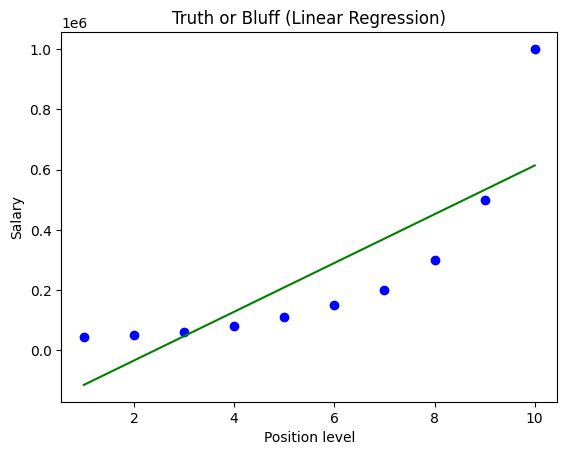

In [17]:
plt.scatter(X, y, color = 'blue')
plt.plot(X,lin_reg.predict(X), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- The blue point is the real salary.
- The green line is our regression that contains our predictions.
- Our linear regression result is not well adapted to this dataset, that is that many of our prediction is far from the real salary. That why we need a different way to do.

## Visualising the Polynomial Regression results

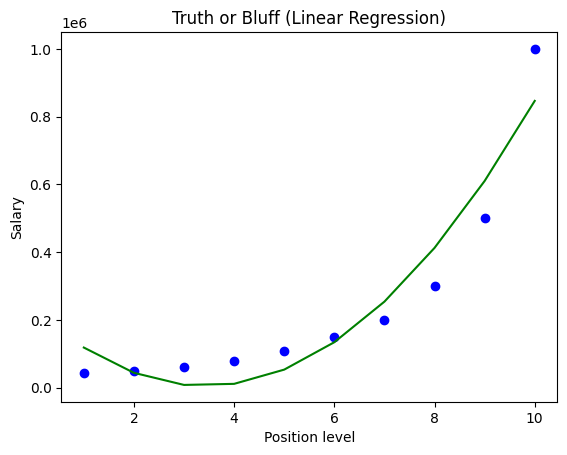

In [18]:
plt.scatter(X, y, color = 'blue')
plt.plot(X,lin_reg_2.predict(X_poly), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- We plot based on lin_reg_2 with the transformed matrix X_poly.
- We now have a regression model which is much closer to the real results.
- Notice that with the degree of 2 as above, our data is overfitting => we change the degree to 4 and retrain our model.


### Change the degree

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

Repeated the same steps as above. Then, reploted our polynomial regression.

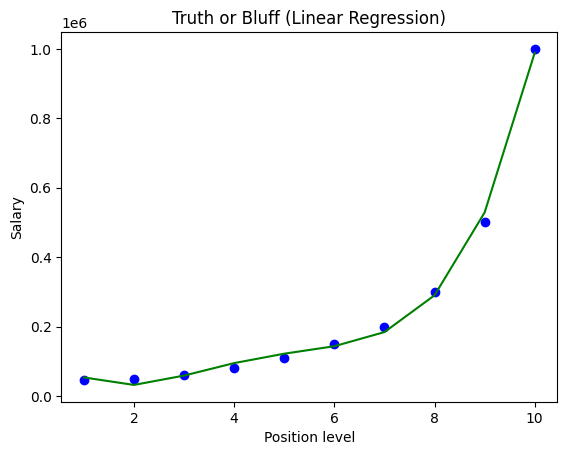

In [21]:
plt.scatter(X, y, color = 'blue')
plt.plot(X,lin_reg_2.predict(X_poly), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- Our predition this time is more accurate of the salaries. But it is not as smooth and nice as we want.
- To improve it, we adjust a bit with our code as below:

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

- Instead of taking integer, we take the density between the dot as 0.1 (good practice for large dataset).

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [23]:
lin_reg.predict([[6.5]]) # Since we want to predict the salary of a particular level postion


array([330378.78787879])

- lin_reg.predict([[6.5]]): lin_reg.predict(an array) in our case it is 2D array.
- If we use this model then with that level, the predicted salary is > 330k, it is way over the salary this person is asking for. It's a bad prediction.

## Predicting a new result with Polynomial Regression

In [24]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

Our current prediction is closer to the salary that person is asking for. So now we can concluded that he/she is a honest person, good fit for the job, etc.
